In [11]:
#Here is a basic test on our most basic model: based on https://www.tensorflow.org/tutorials/keras/regression

import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.keras.backend.set_floatx('float64')

def basic_model():
    model_test = tf.keras.Sequential([
        tf.keras.layers.Dense(5,input_dim = 5, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation = tf.nn.relu,dtype='float64'),
        #tf.keras.layers.Dense(10, activation = tf.nn.relu),
        tf.keras.layers.Dense(3,activation='linear')
    ])
    optimizer = tf.keras.optimizers.SGD(0.01)

    model_test.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'accuracy'])

    return model_test



train_x_data = np.matrix([[-1,-2,-3,-4,-5],[2,3,4,5,6],[7,8,9,10,11]])
train_x_data = np.matrix([[-1,0,0,-1,0],[2,3,4,5,6],[-1,-2,-3,-4,-5]])
train_y_data = np.matrix([[0,0,0],[0,0,1],[0,1,0]])
model2 = basic_model()
train = model2.fit(train_x_data, train_y_data, epochs=10)
test_x_data = np.matrix([[4,5,6,7,8],[-4,-5,-6,-7,-8]])
test_y_data = np.matrix([[0,0,1],[0,1,0]])
test = model2.evaluate(test_x_data, test_y_data)


Epoch 1/10
1/1 [==============================] - 0s 868us/step - loss: 0.2164 - mae: 0.2385 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 626us/step - loss: 0.1899 - mae: 0.2350 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 633us/step - loss: 0.1780 - mae: 0.2278 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 790us/step - loss: 0.1688 - mae: 0.2244 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 575us/step - loss: 0.1625 - mae: 0.2226 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 632us/step - loss: 0.1578 - mae: 0.2209 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 603us/step - loss: 0.1539 - mae: 0.2196 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 667us/step - loss: 0.1504 - mae: 0.2189 - accuracy: 0.6667
Epoch 9/10
1/1 [==============================] - 0s 582us/step - loss: 0.1476 - mae: 0.2184 - accuracy:

In [12]:
#This is getting both a training and a test set from the licenses data
boston_licenses = pd.read_csv('/Users/kellyduncan/Downloads/liquor_licenses_full.csv')
boston_l_c = boston_licenses.groupby(['neighborhood'])['BUSINESSNAME'].count().reset_index().rename(columns={'BUSINESSNAME':'n_count'})
boston_l_c['Third_count'] = (boston_l_c['n_count']/3).astype(int)
boston_l_c
boston_licenses = boston_licenses.merge(boston_l_c[['n_count','Third_count']],  how='outer', left_on=boston_licenses['neighborhood'], right_on=boston_l_c['neighborhood'])
boston_licenses

def data_subset_license(data_set):
#    #all data set finals should be mod 0 of batch number...
    new_data = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
    test_data = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
    for row in data_set['neighborhood'].unique():
        i = 0
        new_data_n = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
        test_data_n = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
        data_set_1 = data_set[data_set.neighborhood.eq(row)]
        for index1, row1 in data_set_1.iterrows():
            #print(i)
            #print(row1['Third_count'] , ', ', row1['Third_count']+row1['n_count']/10 )
            if i < row1['Third_count']:
                #print(row1[['neighborhood','BUSINESSNAME','ltype']])
                new_data_n = new_data_n.append(row1[['neighborhood','BUSINESSNAME','ltype']], ignore_index = True)
                i+= 1
            elif i >= row1['Third_count'] and i < (row1['Third_count']+row1['n_count']/10):
                test_data_n = test_data_n.append(row1[['neighborhood','BUSINESSNAME','ltype']], ignore_index = True)
                i+=1
            else:
                break
        #print(new_data_n)
        new_data = new_data.append(new_data_n)
        test_data = test_data.append(test_data_n)
    return new_data, test_data

                

license_data_batch, license_test_data = data_subset_license(boston_licenses)
license_data_batch = license_data_batch.groupby(['neighborhood'])['BUSINESSNAME'].count().reset_index().rename(columns={'BUSINESSNAME':'licenses'})
print(license_test_data.shape)
license_test_data = license_test_data.groupby(['neighborhood'])['BUSINESSNAME'].count().reset_index().rename(columns={'BUSINESSNAME':'licenses'})

license_test_data_2 = boston_licenses.loc[555:666]
license_test_data = license_test_data_2.groupby(['neighborhood'])['BUSINESSNAME'].count().reset_index().rename(columns={'BUSINESSNAME':'licenses'})
license_test_data.shape

(111, 3)


(2, 2)

Batched:  (4588, 22)
   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1 neighborhood  \
0           0             0               0                 0  Beacon Hill   
1           1             1               1                 0  Beacon Hill   
2           2             2               2                 0  Beacon Hill   
3           3             3               3                 0  Beacon Hill   
4           4             4               4                 0  Beacon Hill   
5           5             5               5                 0  Beacon Hill   
6           6             6               6                 0  Beacon Hill   
7           7             7               7                 0  Beacon Hill   
8           8             8               8                 0  Beacon Hill   
9           9             9               9                 0  Beacon Hill   

   LAND_SF  YR_BUILT  YR_REMOD   AV_LAND    AV_BLDG  ...  LAND_SF.1  \
0   1117.1    1875.0    2002.0       0.0  1634200

144/144 [==============================] - 0s 576us/step - loss: 0.0219 - mae: 0.1019 - accuracy: 0.0684
Epoch 42/100
144/144 [==============================] - 0s 639us/step - loss: 0.0216 - mae: 0.1016 - accuracy: 0.0684
Epoch 43/100
144/144 [==============================] - 0s 799us/step - loss: 0.0215 - mae: 0.1005 - accuracy: 0.0687
Epoch 44/100
144/144 [==============================] - 0s 583us/step - loss: 0.0218 - mae: 0.1011 - accuracy: 0.0682
Epoch 45/100
144/144 [==============================] - 0s 571us/step - loss: 0.0215 - mae: 0.1009 - accuracy: 0.0687
Epoch 46/100
144/144 [==============================] - 0s 578us/step - loss: 0.0214 - mae: 0.1008 - accuracy: 0.0687
Epoch 47/100
144/144 [==============================] - 0s 577us/step - loss: 0.0214 - mae: 0.1006 - accuracy: 0.0695
Epoch 48/100
144/144 [==============================] - 0s 831us/step - loss: 0.0213 - mae: 0.1013 - accuracy: 0.0691
Epoch 49/100
144/144 [==============================] - 0s 706us/step

    neighborhood      LAND_SF  YR_BUILT  YR_REMOD    AV_LAND    AV_BLDG  \
0              3   792.000000    1920.0     201.5        0.0   712520.0   
1              3   872.000000    1920.0     801.2        0.0   783200.0   
2              3   852.500000    1920.0     803.1        0.0   794240.0   
3              3   882.900000    1897.9    1194.0   151990.0   800320.0   
4              3  1881.600000    1861.0    1996.4   198320.0  1998792.0   
5              3  2014.800000    1938.5    2005.7        0.0  3818590.0   
6              3  1840.400000    1940.8    1802.8   678660.0  2082800.0   
7              3  1227.200000    1889.4    1992.5   241830.0  1192470.0   
8              3   953.600000    1895.2    1992.5    97940.0   971710.0   
9              3   501.400000    1880.4    1796.5   177100.0   671740.0   
10             3   803.100000    1885.7    1990.8   204460.0   667910.0   
11             3  1060.600000    1904.1    1803.2   245230.0  1291270.0   
12             3  1277.30

43/43 [==============================] - 0s 474us/step - loss: 0.0142 - mae: 0.0771 - accuracy: 0.0778
[[0.10218234]
 [0.16246723]
 [0.16144158]
 [0.20390956]
 [0.15186838]]
Labels y:  [0.11764706 0.11764706 0.11764706 0.11764706 0.11764706]
tf.Tensor(
[[-0.01546472  0.04482017  0.04379453 ...  0.06121751  0.06764469
   0.01460432]], shape=(1, 1376), dtype=float64)
test loss, test acc: [0.014233300767278537]
Accuracy:  7.776162790697675
1.0


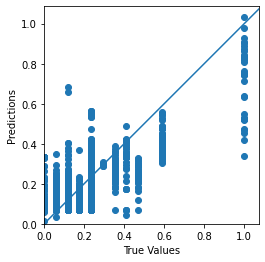

In [13]:
#Basic Multilayer model to test, still needing to do some pre-processing.  My life is just preprocessing.
from sklearn.preprocessing import MinMaxScaler

tf.keras.backend.set_floatx('float64')

def basic_model():
    model_test = tf.keras.Sequential([
        tf.keras.layers.Dense(13, input_dim = 13, \
                              kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), \
                              activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation = tf.nn.sigmoid,dtype='float64'),
        tf.keras.layers.Dense(10, activation = tf.nn.relu,dtype='float64'),
        tf.keras.layers.Dense(1,activation='linear',dtype='float64')
    ])
    optimizer = tf.keras.optimizers.Nadam(0.01)

    model_test.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'accuracy'])

    return model_test


batched_data = pd.read_csv('/Users/kellyduncan/Downloads/Property_subset_1.csv')
print("Batched: ", batched_data.shape)
print(batched_data.head(10))
license_data_batch_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')
#license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
print("License: ", license_data_batch_final.head(10))
batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'], right_on=license_data_batch_final['neighborhood'].astype(str))
batched_data_final = batched_data_final.drop(columns=['key_0'])
#print(batched_data_final.head(10))
#print(batched_data_final.dtypes)

#target = batched_data_final.pop('licenses')
#print(target.head(10))


batched_data_final['neighborhood'] = pd.Categorical(batched_data_final['neighborhood'])
batched_data_final['neighborhood'] = batched_data_final.neighborhood.cat.codes
batched_data_final = batched_data_final.drop(columns=['n_count','Third_count','U_INT_CND','LAND_SF.1'])
batched_data_final = batched_data_final.drop(columns = list(batched_data_final.filter(regex='Unnamed')))
#print(batched_data_final.head(10))
np.array(batched_data_final, dtype=np.float)
scaler = MinMaxScaler()
scaler.fit(batched_data_final)
normalized = scaler.transform(batched_data_final)
print(normalized.shape , ', ', normalized.dtype)
print(batched_data_final.shape, ', ', batched_data_final.values.dtype)
train_data_x = normalized[:,0:13]
#print(train_data_x.shape)
#print(train_data_x[0:10])
train_data_y = normalized[:,14]
print("Labels Train: ", train_data_y[0:10])

dataset = tf.data.Dataset.from_tensor_slices((train_data_x, train_data_y))


model3 = basic_model()

#result = model2.predict(dataset)
#model2.summary()
#result[0:20]
train = model3.fit(train_data_x,train_data_y, epochs=100)

test_data_subset = pd.read_csv('/Users/kellyduncan/Downloads/Property_test.csv')
print("Property: ", test_data_subset.head(10))
print("Property Test Shape: ",test_data_subset.shape)
test_license_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')#results = model2.evaluate(train_data_x, train_data_y)
#print(license_test_data.head(5))
#test_license_data = license_test_data[['neighborhood','licenses']]
test_license_final = test_license_final[['neighborhood','licenses']]
print("License: ", test_license_final.head(10))
test_data_final = test_data_subset.merge(test_license_final['licenses'],  how='outer', left_on=test_data_subset['neighborhood'], right_on=test_license_final['neighborhood'].astype(str))
test_data_final['neighborhood'] = pd.Categorical(test_data_final['neighborhood'])
test_data_final['neighborhood'] = test_data_final.neighborhood.cat.codes
test_data_final = test_data_final.drop(columns=['key_0','Third_count','n_count','U_INT_CND','LAND_SF.1'])
test_data_final = test_data_final.drop(columns = list(test_data_final.filter(regex='Unnamed')))
test_data_final['licenses']=test_data_final['licenses'].fillna(0.0)
print(test_data_final.head(30))
np.array(test_data_final, dtype=np.float)
scaler_test = MinMaxScaler()
scaler_test.fit(test_data_final)
normalized_test = scaler_test.transform(test_data_final)
print(normalized[0:5])
print(normalized_test[0:5])
#print(normalized_test.shape, ", ", normalized.dtype)
test_data_x = normalized_test[:,0:13]
#print(test_data_x.shape)
#print(test_data_x[0:10])
test_data_y = normalized_test[:,14]
print(test_data_y[0:5])
print(test_data_y.shape)
result = model3.evaluate(test_data_x, test_data_y)
prediction = model3.predict(test_data_x)
print(prediction[0:5])
print('Labels y: ', test_data_y[0:5])
print(tf.transpose(prediction)-test_data_y)
print("test loss, test acc:", result[0:1])
print("Accuracy: ",result[2]*100)
print(np.amax(normalized_test))

plt.scatter(test_data_y, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [16]:
#Creating my own one layer model, as the multilayer model didn't do much, and want to see what a single layer
#model does, as it see what a model that was used for a linear regression that did well for that data did
# for our data
#This is based on: https://towardsdatascience.com/linear-regression-from-scratch-with-tensorflow-2-part-1-3e2443804df0
#THis is pretty much homework 3 using tensorflow instead of numpy.  Which you should think doing in the future,
#as I found thsi much easier, and helped me understand tensorflow better, and understand other models
def mean_squared_error( Y , y_pred ):
    y = tf.reshape(Y,[Y.shape[0],1])
    #print(y_pred.shape, ', ', y.shape)#tf.reshape(tf.transpose(Y),(tf.transpose(Y).shape[0],1)))
    #print(tf.reshape(Y,[Y.shape[0],1]).shape)
    #print("MSE Not Squared: ", (y_pred- y)[0:10])
    return tf.reduce_mean( tf.square( y_pred - y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias


#cont_var = train_data_x['LAND_SF', 'YR_BUILT','YR_REMOD','AV_LAND','AV_BLDG','AV_TOTAL','GROSS_TAX','GROSS_AREA', \
#              'LIVING_AREA', 'PPSQRT'].values /100
#cate_var = ['AC_final','HEAT_TYP','Tax_Exempt']

#continuous_features = train_data_y[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
#categorical_research_features = data[ [ 'Research' ] ].values 

X = tf.constant( train_data_x , dtype=tf.float32 )
Y = tf.constant( train_data_y , dtype=tf.float32 ) 
                                                          
test_X = tf.constant( test_data_x , dtype=tf.float32 ) 
test_Y = tf.constant( test_data_y , dtype=tf.float32 )


num_epochs = 1000
num_samples = X.shape[0]
batch_size = 100
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 1000 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        output_2 = tf.keras.activations.linear(output)
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    if i%50==0:
        print( 'Loss is {}'.format( loss ) ) 
        #print('output: ', output.numpy()[0:3])
        #print(y_batch.shape[0])
        #print('labels: ', tf.reshape(y_batch,[y_batch.shape[0],1]).numpy()[0:3])
        #print('output - y: ', (output-tf.reshape(y_batch,[y_batch.shape[0],1])).numpy()[0:3])

Loss is 0.2817027270793915
Loss is 0.050753865391016006
Loss is 0.049747779965400696
Loss is 0.0507982112467289
Loss is 0.05021433159708977
Loss is 0.050825923681259155
Loss is 0.05017498508095741
Loss is 0.049749817699193954
Loss is 0.05065899342298508
Loss is 0.0508400984108448
Loss is 0.0505189374089241
Loss is 0.05050760507583618
Loss is 0.05068576708436012
Loss is 0.05117247253656387
Loss is 0.05048386752605438
Loss is 0.05037384107708931
Loss is 0.051525820046663284
Loss is 0.04921639710664749
Loss is 0.05021778866648674
Loss is 0.05018966645002365


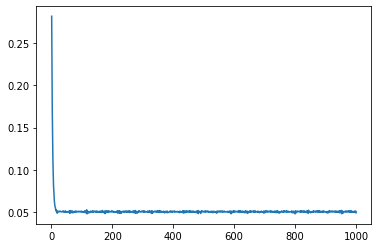

[[1.25000000e-01 2.19396974e-04 9.52853598e-01 1.00114274e-01
  0.00000000e+00 1.19736119e-03 9.24796144e-04 2.75769162e-03
  2.27754405e-03 2.45580938e-03 5.00000000e-01 1.00000000e+00
  0.00000000e+00 1.65864023e-05 1.17647059e-01]
 [1.25000000e-01 2.54500490e-04 9.52853598e-01 3.98072241e-01
  0.00000000e+00 1.31613609e-03 1.01848464e-03 3.03124724e-03
  2.50759900e-03 2.70387094e-03 5.50000000e-01 1.00000000e+00
  0.00000000e+00 1.64378176e-05 1.17647059e-01]
 [1.25000000e-01 2.45944008e-04 9.52853598e-01 3.99016247e-01
  0.00000000e+00 1.33468837e-03 1.03311850e-03 3.07397553e-03
  2.45152311e-03 2.64340593e-03 5.00000000e-01 1.00000000e+00
  0.00000000e+00 1.70872283e-05 1.17647059e-01]
 [1.25000000e-01 2.59283344e-04 9.41885856e-01 5.93232971e-01
  6.19309718e-04 1.34490556e-03 1.24264511e-03 3.68575992e-03
  4.09181493e-03 3.84774478e-03 4.50000000e-01 8.28571429e-01
  0.00000000e+00 1.72241694e-05 1.17647059e-01]
 [1.25000000e-01 6.97506861e-04 9.23573201e-01 9.91901426e-01
  

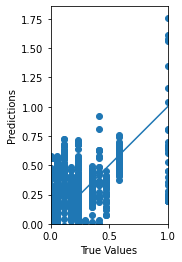

In [17]:
#Ploting and understanding results


plt.plot( epochs_plot , loss_plot ) 
plt.show()

print(normalized_test[0:10])

output = h( test_X , weights , bias )
output_2 = tf.nn.relu(output)
labels = test_Y
print("Output: ", output[200:205])
print("Test Data Labels: ", test_data_y[828:835])
print("Labels: ", test_data_final[828:835])
print("Labels argmax: ", tf.argmax(labels))
labels_new_shape = tf.reshape(labels,[labels.shape[0],1])
print("labels: ", labels_new_shape[200:205])
print("Output - Labels:", (output-labels_new_shape)[200:205])
print("Weights: ", weights)

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels_new_shape , output )
accuracy_2 = tf.metrics.Accuracy()
accuracy_2.update_state(labels_new_shape, output)
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ), ", Accuracy = {}".format(accuracy_2.result().numpy()) )

plt.scatter(labels_new_shape, output)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,1])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [363]:
final_data_final = []
print(np.array(test_data_final.neighborhood).shape)
final_data_final.append(np.array(test_data_final.neighborhood))
print(test_Y.numpy().shape)
final_data_final.append(test_Y.numpy())
print(np.squeeze(output.numpy()).shape)
final_data_final.append(np.squeeze(output.numpy()))
print(np.asarray(final_data_final).shape)
print(np.asarray(final_data_final))
final_data_final = np.asarray(final_data_final)
final_data_df = pd.DataFrame(final_data_final.T)
print(final_data_df.head(10))
print(final_data_df.shape)
#final_data_df.groupby([0]).mean()
final_data_df.groupby([0]).mean()#.reset_index()
mean_data[1]-mean_data[2]

boston_licenses_final_df = (boston_licenses.groupby(['neighborhood'])['BUSINESSNAME'].count()/boston_licenses['BUSINESSNAME'].count()).reset_index().rename(columns={'BUSINESSNAME':'licenses'})
final_data = final_data_df.merge(boston_licenses_final_df[['licenses','neighborhood']],how='outer', left_on=final_data_df[0],right_index=True)
print(boston_licenses_final_df)
print(final_data.groupby(final_data['neighborhood'])[2].mean().reset_index().fillna(0)[2])
softmax_data = final_data.groupby(final_data['neighborhood'])[2].mean().reset_index().fillna(0)[2]
print(final_data.shape)
boston_licenses_final_df['softmax']=tf.nn.softmax(softmax_data).numpy()
boston_licenses_final_df['diff']= -boston_licenses_final_df['licenses']+boston_licenses_final_df['softmax']
boston_licenses_final_df



#(final_data.groupby(['neighborhood'])['diff'].sum()/final_data.groupby(['neighborhood'])['diff'].count()).reset_index()
#print(batched_data_final[batched_data_final['neighborhood']==25].head(10))
#boston_test_accuracy = 
#test_data_final['neighborhood']
#print(test_Y[0:10])
#print(output[0:10])

(1376,)
(1376,)
(1376,)
(3, 1376)
[[ 3.          3.          3.         ... 15.         15.
  15.        ]
 [ 0.11764706  0.11764706  0.11764706 ...  0.          0.
   0.        ]
 [ 0.2504555   0.43116748  0.3883251  ... -0.02746582 -0.19226944
  -0.08690631]]
     0         1         2
0  3.0  0.117647  0.250455
1  3.0  0.117647  0.431167
2  3.0  0.117647  0.388325
3  3.0  0.117647  0.576158
4  3.0  0.117647  1.117429
5  3.0  0.117647  1.164730
6  3.0  0.117647  1.105725
7  3.0  0.117647  0.753609
8  3.0  0.117647  1.197312
9  3.0  0.117647  0.816957
(1376, 3)
               neighborhood  licenses
0                   Allston  0.048563
1                  Back Bay  0.109019
2               Bay Village  0.007929
3               Beacon Hill  0.023786
4                  Brighton  0.027750
5               Charlestown  0.016848
6                 Chinatown  0.034688
7                Dorchester  0.049554
8                  Downtown  0.176412
9               East Boston  0.048563
10           

,neighborhood,licenses,softmax,diff
0,Allston,0.048563,0.082539,0.033976
1,Back Bay,0.109019,0.070089,-0.038930
2,Bay Village,0.007929,0.063747,0.055818
3,Beacon Hill,0.023786,0.062205,0.038419
4,Brighton,0.027750,0.050750,0.023000
5,Charlestown,0.016848,0.053854,0.037006
6,Chinatown,0.034688,0.050064,0.015376
7,Dorchester,0.049554,0.038948,-0.010606
8,Downtown,0.176412,0.082508,-0.093905
9,East Boston,0.048563,0.027487,-0.021076


In [300]:
#Testing out different ways of pre-processing, in terms of when do I want to change neighborhood from string to categorical variable
batched_data = pd.read_csv('/Users/kellyduncan/Downloads/Property_subset_1.csv')
print("Batched: ", batched_data.shape)
batched_data = batched_data.drop(columns = list(batched_data.filter(regex='Unnamed')))
print(batched_data.neighborhood.head(10))
#license_data_batch_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')
#license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
license_data = license_data_batch_final[['neighborhood','licenses']]
print(license_data.neighborhood.astype(str).dtype)
print(batched_data.neighborhood.dtype)
print("License: ", boston_licenses.head(10))
batched_data.merge(license_data_batch_final[['neighborhood','licenses']],how='outer',left_on=batched_data.neighborhood, right_on=license_data.neighborhood.astype(str))
batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'].astype(str), right_on=license_data_batch_final['neighborhood'].astype(str))
batched_data_final
#batched_data_final = batched_data_final.drop(columns=['key_0'])

Batched:  (4588, 22)
0    Beacon Hill
1    Beacon Hill
2    Beacon Hill
3    Beacon Hill
4    Beacon Hill
5    Beacon Hill
6    Beacon Hill
7    Beacon Hill
8    Beacon Hill
9    Beacon Hill
Name: neighborhood, dtype: object
object
object
License:        key_0  Unnamed: 0                           BUSINESSNAME  \
0  Downtown           0             NEW ENGLAND AQUARIUM CORP.   
1  Downtown           1               SPEAK EASY CONCEPTS, LLC   
2  Downtown           2                       FROST GROUP, LLC   
3  Downtown          11                  THE BOSTON LECO CORP.   
4  Downtown          18         SIP WINE BAR AND KITCHEN, INC.   
5  Downtown          29               K.M.F. HOSPITALITY, INC.   
6  Downtown          46  ATLANTIC SHORE RESTAURANT CORPORATION   
7  Downtown          47                         GLORY RBG, LLC   
8  Downtown          50                    THE BACK DECK, INC.   
9  Downtown          73              CJ WASHINGTON STREET, LLC   

                  ISSDTT

,key_0,neighborhood,LAND_SF,YR_BUILT,YR_REMOD,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF.1,GROSS_AREA,LIVING_AREA,U_INT_CND,AC_final,HEAT_TYP,Tax_Exempt,PPSQFT,n_count,Third_count,licenses
0,Beacon Hill,Beacon Hill,1117.1,1875.0,2002.0,0.0,1634200.0,1634200.0,1722446.8,1117.1,1117.1,1117.1,0.6,0.2,6.0,0.0,1224.076136,3501.0,1167.0,0.027027
1,Beacon Hill,Beacon Hill,1346.9,1892.8,1790.3,137340.0,1280360.0,1417700.0,1494255.9,1346.9,1751.4,1571.0,1.2,0.2,4.3,0.0,1063.585140,3501.0,1167.0,0.027027
2,Beacon Hill,Beacon Hill,1387.8,1740.1,1590.3,236220.0,1386976.4,1623196.4,1513698.3,1387.8,2016.9,1688.1,0.3,0.0,3.6,0.2,90325.076919,3501.0,1167.0,0.027027
3,Beacon Hill,Beacon Hill,726.7,1940.0,1983.7,0.0,761110.0,761110.0,802210.0,726.7,726.7,726.7,0.3,0.0,6.0,0.0,1065.454169,3501.0,1167.0,0.027027
4,Beacon Hill,Beacon Hill,1162.8,1922.8,1994.8,263350.0,1147490.0,1410840.0,1487025.4,1162.8,2460.7,2079.8,0.5,0.3,4.8,0.0,904.269288,3501.0,1167.0,0.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,Mattapan,Mattapan,31137.8,1916.5,1000.8,487310.0,908490.0,1395800.0,409679.6,31137.8,9181.8,5964.9,-1.0,0.1,4.8,0.1,148.244096,4379.0,1459.0,0.009009
4584,Mattapan,Mattapan,4447.3,1909.5,402.1,117260.0,302770.0,420030.0,442711.9,4447.3,2841.0,1600.3,-1.0,0.0,3.5,0.0,153.631984,4379.0,1459.0,0.009009
4585,Mattapan,Mattapan,4797.2,1947.0,200.1,121970.0,277570.0,399540.0,421115.5,4797.2,2265.5,1346.0,-1.0,0.0,6.0,0.0,181.357198,4379.0,1459.0,0.009009
4586,Mattapan,Mattapan,7390.1,1944.9,401.5,142560.0,334120.0,476680.0,502421.0,7390.1,2937.4,1699.2,-1.0,0.0,5.5,0.0,164.346556,4379.0,1459.0,0.009009


In [382]:
#making sure teh data is what I expect it to be.  Merges in pandas sometimes add extra columns I don't want
print(np.amax(test_data_y))
print(np.argmax(test_data_y))
normalized_test[np.argmax(normalized_test)]
normalized_test[normalized_test[:,14]==1]
normalized_test[normalized_test[:,0]==1/24]

1.0
1065


array([1.25000000e-01, 3.37257029e-04, 9.44962779e-01, 8.95910965e-01,
       9.99232331e-04, 2.16992729e-03, 2.01700680e-03, 5.94677071e-03,
       5.57336884e-03, 4.92991331e-03, 9.00000000e-01, 5.00000000e-01,
       0.00000000e+00, 1.62287181e-05, 1.17647059e-01])

(4588, 15) ,  float64
(4588, 15) ,  float64
Labels Train:  [0.11764706 0.11764706 0.11764706 0.11764706 0.11764706 0.11764706
 0.11764706 0.11764706 0.11764706 0.11764706]
Epoch 1/200
144/144 [==============================] - 0s 2ms/step - loss: 0.0399 - mae: 0.1362 - accuracy: 0.0519 - val_loss: 0.0322 - val_mae: 0.1281 - val_accuracy: 0.0545
Epoch 2/200
144/144 [==============================] - 0s 831us/step - loss: 0.0326 - mae: 0.1233 - accuracy: 0.0519 - val_loss: 0.0315 - val_mae: 0.1224 - val_accuracy: 0.0567
Epoch 3/200
144/144 [==============================] - 0s 813us/step - loss: 0.0315 - mae: 0.1198 - accuracy: 0.0521 - val_loss: 0.0300 - val_mae: 0.1200 - val_accuracy: 0.0574
Epoch 4/200
144/144 [==============================] - 0s 808us/step - loss: 0.0303 - mae: 0.1172 - accuracy: 0.0530 - val_loss: 0.0302 - val_mae: 0.1203 - val_accuracy: 0.0574
Epoch 5/200
144/144 [==============================] - 0s 828us/step - loss: 0.0293 - mae: 0.1165 - accuracy: 0.0536 - val

144/144 [==============================] - 0s 836us/step - loss: 0.0074 - mae: 0.0561 - accuracy: 0.0798 - val_loss: 0.0148 - val_mae: 0.0726 - val_accuracy: 0.0763
Epoch 47/200
144/144 [==============================] - 0s 827us/step - loss: 0.0070 - mae: 0.0538 - accuracy: 0.0804 - val_loss: 0.0152 - val_mae: 0.0651 - val_accuracy: 0.0683
Epoch 48/200
144/144 [==============================] - 0s 838us/step - loss: 0.0070 - mae: 0.0537 - accuracy: 0.0798 - val_loss: 0.0149 - val_mae: 0.0667 - val_accuracy: 0.0698
Epoch 49/200
144/144 [==============================] - 0s 796us/step - loss: 0.0070 - mae: 0.0538 - accuracy: 0.0802 - val_loss: 0.0116 - val_mae: 0.0667 - val_accuracy: 0.0792
Epoch 50/200
144/144 [==============================] - 0s 825us/step - loss: 0.0068 - mae: 0.0533 - accuracy: 0.0804 - val_loss: 0.0124 - val_mae: 0.0623 - val_accuracy: 0.0756
Epoch 51/200
144/144 [==============================] - 0s 803us/step - loss: 0.0066 - mae: 0.0526 - accuracy: 0.0806 - val

144/144 [==============================] - 0s 817us/step - loss: 0.0048 - mae: 0.0437 - accuracy: 0.0809 - val_loss: 0.0120 - val_mae: 0.0532 - val_accuracy: 0.0763
Epoch 93/200
144/144 [==============================] - 0s 831us/step - loss: 0.0046 - mae: 0.0421 - accuracy: 0.0809 - val_loss: 0.0139 - val_mae: 0.0529 - val_accuracy: 0.0763
Epoch 94/200
144/144 [==============================] - 0s 779us/step - loss: 0.0048 - mae: 0.0433 - accuracy: 0.0809 - val_loss: 0.0132 - val_mae: 0.0561 - val_accuracy: 0.0763
Epoch 95/200
144/144 [==============================] - 0s 784us/step - loss: 0.0046 - mae: 0.0420 - accuracy: 0.0809 - val_loss: 0.0127 - val_mae: 0.0543 - val_accuracy: 0.0763
Epoch 96/200
144/144 [==============================] - 0s 819us/step - loss: 0.0046 - mae: 0.0428 - accuracy: 0.0809 - val_loss: 0.0147 - val_mae: 0.0584 - val_accuracy: 0.0763
Epoch 97/200
144/144 [==============================] - 0s 841us/step - loss: 0.0045 - mae: 0.0421 - accuracy: 0.0809 - val

Epoch 138/200
144/144 [==============================] - 0s 791us/step - loss: 0.0038 - mae: 0.0358 - accuracy: 0.0809 - val_loss: 0.0103 - val_mae: 0.0481 - val_accuracy: 0.0763
Epoch 139/200
144/144 [==============================] - 0s 804us/step - loss: 0.0038 - mae: 0.0364 - accuracy: 0.0809 - val_loss: 0.0111 - val_mae: 0.0504 - val_accuracy: 0.0778
Epoch 140/200
144/144 [==============================] - 0s 836us/step - loss: 0.0037 - mae: 0.0361 - accuracy: 0.0809 - val_loss: 0.0103 - val_mae: 0.0459 - val_accuracy: 0.0763
Epoch 141/200
144/144 [==============================] - 0s 807us/step - loss: 0.0037 - mae: 0.0357 - accuracy: 0.0809 - val_loss: 0.0124 - val_mae: 0.0505 - val_accuracy: 0.0763
Epoch 142/200
144/144 [==============================] - 0s 817us/step - loss: 0.0038 - mae: 0.0366 - accuracy: 0.0809 - val_loss: 0.0122 - val_mae: 0.0491 - val_accuracy: 0.0763
Epoch 143/200
144/144 [==============================] - 0s 777us/step - loss: 0.0037 - mae: 0.0354 - acc

Epoch 184/200
144/144 [==============================] - 0s 815us/step - loss: 0.0031 - mae: 0.0312 - accuracy: 0.0809 - val_loss: 0.0164 - val_mae: 0.0435 - val_accuracy: 0.0763
Epoch 185/200
144/144 [==============================] - 0s 793us/step - loss: 0.0031 - mae: 0.0304 - accuracy: 0.0809 - val_loss: 0.0147 - val_mae: 0.0449 - val_accuracy: 0.0763
Epoch 186/200
144/144 [==============================] - 0s 803us/step - loss: 0.0031 - mae: 0.0310 - accuracy: 0.0809 - val_loss: 0.0128 - val_mae: 0.0437 - val_accuracy: 0.0763
Epoch 187/200
144/144 [==============================] - 0s 810us/step - loss: 0.0030 - mae: 0.0299 - accuracy: 0.0809 - val_loss: 0.0128 - val_mae: 0.0436 - val_accuracy: 0.0763
Epoch 188/200
144/144 [==============================] - 0s 806us/step - loss: 0.0031 - mae: 0.0305 - accuracy: 0.0809 - val_loss: 0.0160 - val_mae: 0.0477 - val_accuracy: 0.0763
Epoch 189/200
144/144 [==============================] - 0s 774us/step - loss: 0.0031 - mae: 0.0302 - acc

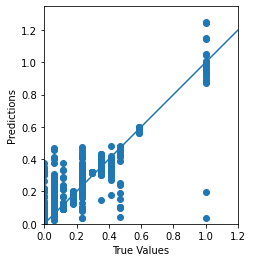

In [68]:
#Basic Multilayer model to test, still needing to do some pre-processing.  My life is just preprocessing.
from sklearn.preprocessing import MinMaxScaler

tf.keras.backend.set_floatx('float64')

def less_basic_model():
    model_test = tf.keras.Sequential([
        tf.keras.layers.Dense(13, input_dim = 13, \
                              kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), \
                              activation=tf.nn.relu),
        tf.keras.layers.Dense(50, activation = tf.nn.relu,dtype='float64'),
        tf.keras.layers.Dense(25, activation = tf.nn.relu,dtype='float64'),
        tf.keras.layers.Dense(1,activation='linear',dtype='float64')
    ])
    optimizer = tf.keras.optimizers.Nadam(0.001)

    model_test.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'accuracy'])

    return model_test


batched_data = pd.read_csv('/Users/kellyduncan/Downloads/Property_subset_1.csv')
#print("Batched: ", batched_data.shape)
#print(batched_data.head(10))
#license_data_batch_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')
#license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
#print("License: ", license_data_batch_final.head(10))
batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'], right_on=license_data_batch_final['neighborhood'].astype(str))
batched_data_final = batched_data_final.drop(columns=['key_0'])
#print(batched_data_final.head(10))
#print(batched_data_final.dtypes)

batched_data_final['neighborhood'] = pd.Categorical(batched_data_final['neighborhood'])
batched_data_final['neighborhood'] = batched_data_final.neighborhood.cat.codes
batched_data_final = batched_data_final.drop(columns=['n_count','Third_count','U_INT_CND','LAND_SF.1'])
batched_data_final = batched_data_final.drop(columns = list(batched_data_final.filter(regex='Unnamed')))
#print(batched_data_final.head(10))
np.array(batched_data_final, dtype=np.float)
scaler = MinMaxScaler()
scaler.fit(batched_data_final)
normalized = scaler.transform(batched_data_final)
print(normalized.shape , ', ', normalized.dtype)
print(batched_data_final.shape, ', ', batched_data_final.values.dtype)
train_data_x = normalized[:,0:13]
#print(train_data_x.shape)
#print(train_data_x[0:10])
train_data_y = normalized[:,14]
print("Labels Train: ", train_data_y[0:10])

dataset = tf.data.Dataset.from_tensor_slices((train_data_x, train_data_y))




test_data_subset = pd.read_csv('/Users/kellyduncan/Downloads/Property_test.csv')
#print("Property: ", test_data_subset.head(10))
#print("Property Test Shape: ",test_data_subset.shape)
test_license_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')#results = model2.evaluate(train_data_x, train_data_y)
#print(license_test_data.head(5))
#test_license_data = license_test_data[['neighborhood','licenses']]
test_license_final = test_license_final[['neighborhood','licenses']]
#print("License: ", test_license_final.head(10))
test_data_final = test_data_subset.merge(test_license_final['licenses'],  how='outer', left_on=test_data_subset['neighborhood'], right_on=test_license_final['neighborhood'].astype(str))
test_data_final['neighborhood'] = pd.Categorical(test_data_final['neighborhood'])
test_data_final['neighborhood'] = test_data_final.neighborhood.cat.codes
test_data_final = test_data_final.drop(columns=['key_0','Third_count','n_count','U_INT_CND','LAND_SF.1'])
test_data_final = test_data_final.drop(columns = list(test_data_final.filter(regex='Unnamed')))
test_data_final['licenses']=test_data_final['licenses'].fillna(0.0)
#print(test_data_final.head(30))
np.array(test_data_final, dtype=np.float)
scaler_test = MinMaxScaler()
scaler_test.fit(test_data_final)
normalized_test = scaler_test.transform(test_data_final)
#print(normalized[0:5])
#print(normalized_test[0:5])
#print(normalized_test.shape, ", ", normalized.dtype)
test_data_x = normalized_test[:,0:13]
#print(test_data_x.shape)
#print(test_data_x[0:10])
test_data_y = normalized_test[:,14]
#print(test_data_y[0:5])
#print(test_data_y.shape)
model4 = less_basic_model()

#result = model2.predict(dataset)
#model2.summary()
#result[0:20]
train = model4.fit(train_data_x,train_data_y, epochs=200,validation_data=(test_data_x,test_data_y))
result = model4.evaluate(test_data_x, test_data_y)
prediction = model4.predict(test_data_x)
#print(prediction[0:5])
#print('Labels y: ', test_data_y[0:5])
#print(tf.transpose(prediction)-test_data_y)
print("test loss, test acc:", result[0:1])
print("Accuracy: {}%".format(result[2]*100))

plt.scatter(test_data_y, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,1.2])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [34]:
test_data_subset.drop(columns=['Third_count','n_count','U_INT_CND','LAND_SF.1']).corr()

,Unnamed: 0,LAND_SF,YR_BUILT,YR_REMOD,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,GROSS_AREA,LIVING_AREA,AC_final,HEAT_TYP,Tax_Exempt,PPSQFT
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAND_SF,NaN,1.000000,0.024167,0.019540,0.951171,0.685683,0.812983,0.068774,0.276590,0.287803,-0.206638,-0.181333,0.507996,0.336604
YR_BUILT,NaN,0.024167,1.000000,0.197983,0.026684,0.007915,0.015243,-0.044420,-0.062851,-0.058158,0.472398,0.355913,-0.399563,-0.146265
YR_REMOD,NaN,0.019540,0.197983,1.000000,0.031522,0.031282,0.032660,0.058598,0.027393,0.036248,0.107207,0.090006,-0.101350,-0.010787
AV_LAND,NaN,0.951171,0.026684,0.031522,1.000000,0.831264,0.928470,0.103012,0.365201,0.370759,-0.211980,-0.192216,0.552337,0.327961
AV_BLDG,NaN,0.685683,0.007915,0.031282,0.831264,1.000000,0.978261,0.183487,0.479631,0.475419,-0.200532,-0.194314,0.506527,0.225803
AV_TOTAL,NaN,0.812983,0.015243,0.032660,0.928470,0.978261,1.000000,0.161027,0.456707,0.455966,-0.213067,-0.201539,0.544491,0.273219
GROSS_TAX,NaN,0.068774,-0.044420,0.058598,0.103012,0.183487,0.161027,1.000000,0.828851,0.842794,-0.129529,-0.189274,0.045398,0.168312
GROSS_AREA,NaN,0.276590,-0.062851,0.027393,0.365201,0.479631,0.456707,0.828851,1.000000,0.996704,-0.274989,-0.271870,0.351413,0.219257
LIVING_AREA,NaN,0.287803,-0.058158,0.036248,0.370759,0.475419,0.455966,0.842794,0.996704,1.000000,-0.261016,-0.272642,0.337154,0.227176


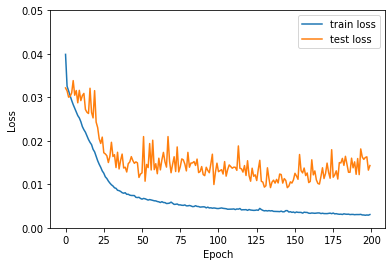

In [69]:
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label = 'test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, .05])
plt.legend(loc='upper right')

    

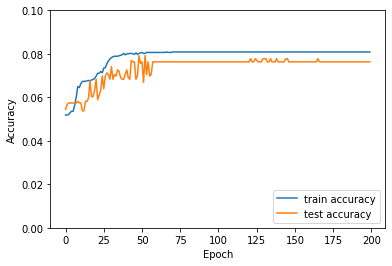

In [70]:
plt.plot(train.history['accuracy'], label='train accuracy')
plt.plot(train.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, .1])
plt.legend(loc='lower right')